In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\DELL\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
wine = pd.read_csv('./wine.csv')
wine

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
  wine.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
class,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity of ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [4]:
wine.shape

(178, 14)

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

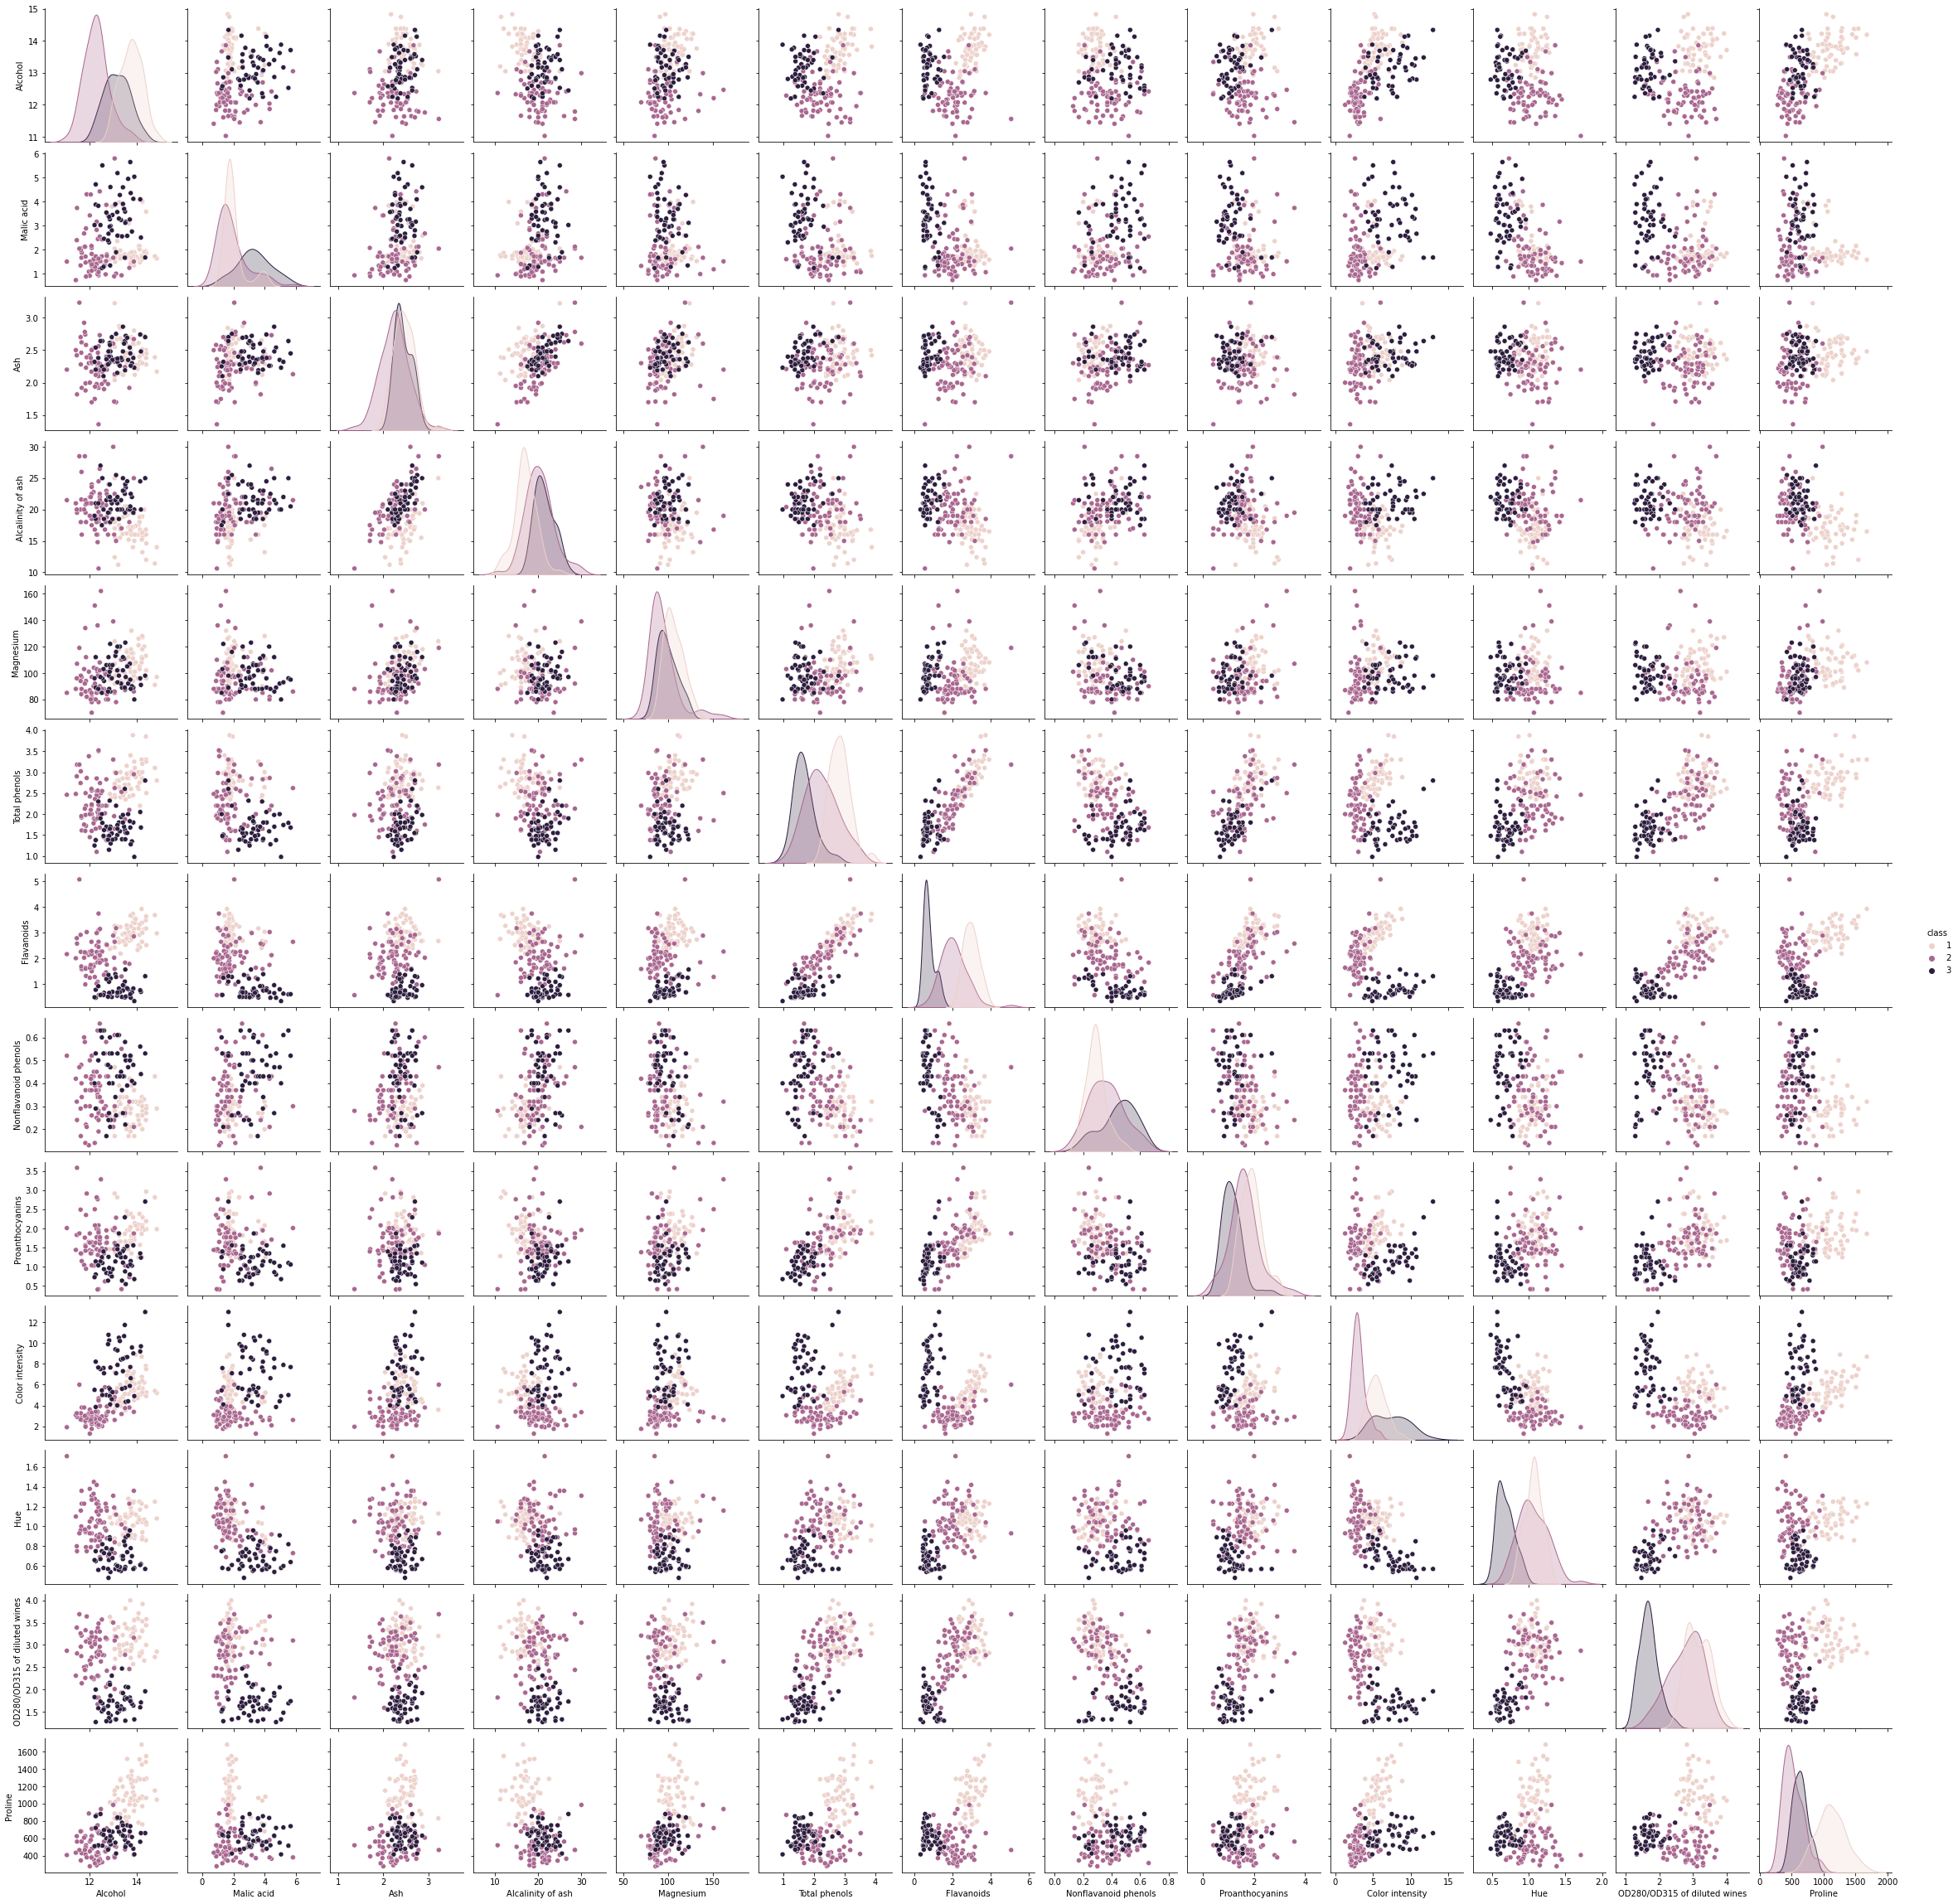

In [6]:
sns.pairplot(wine ,diag_kind='kde',hue='class')
plt.show()

In [7]:
 from sklearn.model_selection import train_test_split
X = wine.drop('class',axis=1)
y=wine.pop('class')

In [8]:
X.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [10]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [11]:
 model.score(X_train,y_train)

0.9758064516129032

In [12]:
test_pred = model.predict(X_test)
test_pred

array([3, 2, 1, 2, 1, 3, 2, 1, 3, 2, 1, 1, 2, 1, 2, 2, 3, 1, 2, 1, 1, 2,
       3, 1, 1, 3, 1, 1, 1, 3, 2, 3, 3, 1, 2, 2, 2, 2, 2, 1, 1, 2, 3, 1,
       1, 1, 2, 1, 1, 1, 2, 3, 3, 1], dtype=int64)

In [13]:
print(metrics.classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       1.00      0.95      0.97        19
           3       1.00      1.00      1.00        12

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [14]:
print(metrics.confusion_matrix(y_test,test_pred))

[[23  0  0]
 [ 1 18  0]
 [ 0  0 12]]


# CONFIDENCE

In [18]:
from sklearn.model_selection import cross_val_predict,cross_val_score

score = cross_val_score(model,X_train,y_train,cv=10)
print('Cross validated scores:',score,score)
print('Average score:',np.average(score))

Cross validated scores: [1.         0.92307692 1.         1.         0.91666667 1.
 0.91666667 1.         1.         0.91666667] [1.         0.92307692 1.         1.         0.91666667 1.
 0.91666667 1.         1.         0.91666667]
Average score: 0.9673076923076922
